# Cognitive Algorithms - Assignment 1
Cognitive Algorithms            
Technische Universität Berlin     
Fachgebiet Maschinelles Lernen 

**Answer the questions on ISIS in 'Assignment 1 - Quiz' and copy code from this notebook where necessary.**
                                  
           

# Programming
---
**Please note that Python is in general slow with loops. Therefore, we will deduct points for the use of unnecessary loops throughout this course.**

---
The linear perceptron and the NCC are linear classification methods. Given training data
$$(\mathbf{x_1}, y_1),\ldots, ( \mathbf{x_n}, y_n ) \in \mathbb{R}^d \times \{-1,1\}$$
their goal is to learn a weight vector $\mathbf{w}$ and a bias term $b$, such that each new data point $\mathbf{x} \in \mathbb{R}^d$ will be assigned the correct class label via the following function:
$$\mathbf x \mapsto  \mbox{sign}(\mathbf w^T \cdot \mathbf x - b)$$


The two methods use different strategies to achieve this goal.
You will programm and compare the perceptron and the prototype classifier and use them to predict handwritten digits. The task is to **classify one digit against all others**.         
If not done yet, download the data set ```usps.mat``` from the ISIS web site. The data set ```usps.mat``` contains handwritten digits from the U.S. Postal Service data set. The data set contains 2007 images and each image consits of 256 pixels.           
Below you can find some useful functions for loading the data and plotting images. 

In [1]:
import numpy as np
import scipy.io as io
import pylab as pl
import seaborn as sns
%matplotlib inline

In [6]:
''' ---- Functions for loading and plotting the images ---- '''
def load_usps_data(fname, digit=3):
    ''' Loads USPS (United State Postal Service) data from <fname> 
    Definition:  X, Y = load_usps_data(fname, digit = 3)
    Input:       fname   - string
                 digit   - optional, integer between 0 and 9, default is 3
    Output:      X       -  DxN array with N images with D pixels
                 Y       -  1D array of length N of class labels
                                 1 - where picture contains the <digit>
                                -1 - otherwise                           
    '''
    # load the data
    data = io.loadmat(fname)
    # extract images and labels
    X = data['data_patterns']
    Y = data['data_labels']
    Y = Y[digit,:]
    return X, Y

def plot_img(a):
    ''' Plots one image 
    Definition: plot_img(a) 
    Input:      a - 1D array that contains an image 
    '''   
    a2 = np.reshape(a,(int(np.sqrt(a.shape[0])), int(np.sqrt(a.shape[0]))))
    pl.imshow(a2, cmap='gray') 
    pl.colorbar()
    pl.setp(pl.gca(), xticks=[], yticks=[])
            
def plot_imgs(X, Y):   
    ''' Plots 3 images from each of the two classes 
    Definition:         plot_imgs(X,Y)
    Input:       X       -  DxN array of N pictures with D pixel
                 Y       -  1D array of length N of class labels {1, -1}                  
    '''
    pl.figure()
    for i in np.arange(3):
        classpos = (Y == 1).nonzero()[0]
        m = classpos[np.random.random_integers(0, classpos.shape[0]-1)]
        pl.subplot(2,3,1+i)
        plot_img(X[:, m])
    for i in np.arange(3):
        classneg = (Y != 1).nonzero()[0]
        m = classneg[np.random.random_integers(0, classneg.shape[0]-1)]
        pl.subplot(2,3,4+i)
        plot_img(X[:, m])

Implement a linear perceptron by completing the function stub  ```train_perceptron```. We will test three different types of update rules for the learning rate (```option``` $\in \{0,1,2\}$).
$$\text{learning rate}(t) = \begin{cases} \frac{\eta}{1+t} & \text{if} \;\; \text{option} = 0  \\ \eta & \text{if} \;\; \text{option} = 1 \\ \eta \cdot (1+t) & \text{if} \;\; \text{option} = 2 \end{cases}$$
where $t$ is the current iteration and $\eta$ the initial value of the learning rate.           

In [12]:
def train_perceptron(X,Y,iterations=200,eta=.1, option=0):
    ''' Trains a linear perceptron
    Definition:  w, b, acc  = train_perceptron(X,Y,iterations=200,eta=.1)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
                 iter    -  optional, number of iterations, default 200
                 eta     -  optional, learning rate, default 0.1
                 option  -  optional, defines how eta is updated in each iteration
    Output:      w       -  1D array of length D, weight vector 
                 b       -  bias term for linear classification                          
                 acc     -  1D array of length iter, contains classification accuracies 
                            after each iteration  
                            Accuracy = #correctly classified points / N 
    '''
    assert option == 0 or option == 1 or option == 2
    np.random.seed(1) # do not change
    acc = np.zeros((iterations))
    #include the bias term by adding a row of ones to X 
    X = np.concatenate((np.ones((1,X.shape[1])), X))
    #initialize weight vector
    weights = np.ones((X.shape[0]))/X.shape[0]
    for it in np.arange(iterations):
        # indices of misclassified data
        wrong = (np.sign(weights.dot(X)) != Y).nonzero()[0]
        # compute accuracy acc[it] (1 point)
        acc[it] = (X.shape[1] - wrong.shape[0]) / X.shape[1]
        if wrong.shape[0] > 0:
            # pick a random misclassified data point (2 points)
            idx = np.random.choice(wrong)
            missclass = X[:, idx]
            #update weight vector (using different learning rates ) (each 1 point)
            if option == 0:
                weights += missclass * Y[idx]  * (eta / (1+it))
            elif option == 1:
                weights += missclass * Y[idx]  * eta
            elif option == 2:
                weights += missclass * Y[idx]  * eta * (1+it)
    b = -weights[0] 
    w = weights[1:]
    #return weight vector, bias and accuracies
    return w,b,acc

''' --------------------------------------------------------------------------------- '''
def analyse_accuracies_perceptron(digit = 3, option=0):
    ''' Loads usps.mat data and plots digit recognition accuracy in the linear perceptron
    Definition: analyse_perceptron(digit = 3)
    '''
    X,Y = load_usps_data('usps.mat',digit)
    w_per,b_per,acc = train_perceptron(X,Y, option=option)
    
    pl.figure()
    pl.plot(np.arange(len(acc)),acc)
    pl.title('Digit recognition accuracy')      
    pl.xlabel('Iterations')
    pl.ylabel('Accuracy')

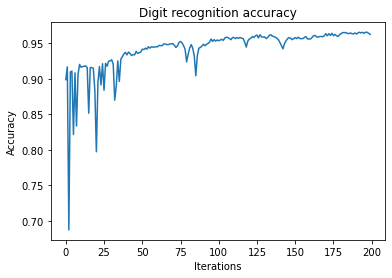

In [13]:
analyse_accuracies_perceptron(3,0)

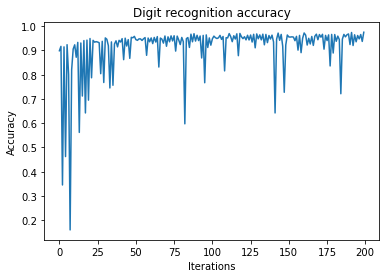

In [14]:
analyse_accuracies_perceptron(3,1)

Implement a Prototype/Nearest Centroid Classifier by completing the function stub ```train_ncc```. Note that points will be deducted for the use of loops. 

In [81]:
def train_ncc(X,Y):
    ''' Trains a prototype/nearest centroid classifier
    Definition:  w, b   = train_ncc(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels {-1, 1}
    Output:      w       -  1D array of length D, weight vector  
                 b       -  bias term for linear classification                          
    '''
    c1_index = list(filter(lambda x: Y[x] == 1, np.arange(X.shape[1])))
    c2_index = list(filter(lambda x: Y[x] == -1, np.arange(X.shape[1])))
    c1 = sum(list(X[:,i] for i in c1_index)) / len(c1_index)
    c2 = sum(list(X[:,i] for i in c2_index)) / len(c2_index)
    w = c1 - c2
    b = (c1.T.dot(c1) - c2.T.dot(c2)) / 2
    return w, b

In [82]:
def plot_histogram(X, Y, w, b):
    ''' Plots the histogram of classifier outputs (w^T X - b) for target (the digit) and non-target (all other digits)
    The title of the plot is the accuracy of the classification
    
    Definition:     plot_accuracies(X, Y, w, b)
    Input:          X       -  DxN array of N data points with D features
                    Y       -  1D array of length N of class labels
                    w       -  1D array of length D, weight vector 
                    b       -  bias term for linear classification   
    '''
    ax = sns.histplot(w.dot(X[:,Y<0])-b, label="non-target", kde=False)
    ax = sns.histplot(w.dot(X[:,Y>0])-b, color="r", label="target", kde=False)
    pl.legend()
    pl.title("Acc %.2f %%" % (100*np.sum(np.sign(w.dot(X)-b)==Y)/X.shape[1]))

def plot_density(X, Y, w, b):
    ''' Plots the kernel density estimate of classifier outputs (w^T X - b) for target (the digit) and non-target (all other digits)
    
    Definition:     plot_accuracies(X, Y, w, b)
    Input:          X       -  DxN array of N data points with D features
                    Y       -  1D array of length N of class labels
                    w       -  1D array of length D, weight vector 
                    b       -  bias term for linear classification   
    '''
    ax = sns.kdeplot(w.dot(X[:,Y<0])-b, label="non-target")
    ax = sns.kdeplot(w.dot(X[:,Y>0])-b, color="r", label="target")
    pl.legend()

def compare_classifiers(digit = 3):
    ''' Loads usps.mat data, trains the perceptron and the Nearest centroid classifiers, 
    and plots their weight vector and classifier output
    Definition: compare_classifiers(digit = 3)
    '''
    X,Y = load_usps_data('usps.mat',digit)
    w_ncc,b_ncc = train_ncc(X,Y)
    w_per,b_per,_ = train_perceptron(X,Y)
    
    pl.figure(figsize=(12,8))
    pl.subplot(3,2,1)
    plot_img(w_ncc)
    pl.title('NCC')
    pl.subplot(3,2,3)
    plot_histogram(X, Y, w_ncc, b_ncc)
    pl.subplot(3,2,5)
    plot_density(X, Y, w_ncc, b_ncc)
    
    pl.subplot(3,2,2)
    plot_img(w_per)
    pl.title('Perceptron')
    pl.subplot(3,2,4)
    plot_histogram(X, Y, w_per, b_per)
    pl.subplot(3,2,6)
    plot_density(X, Y, w_per, b_per)

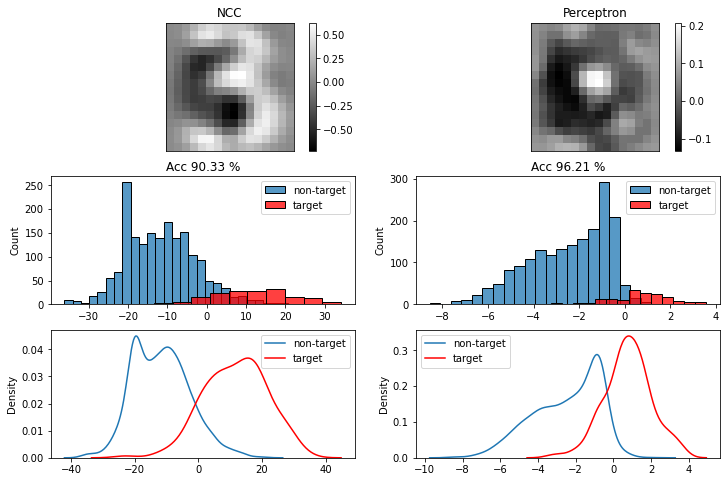

In [83]:
# Call compare_classifiers to compare the performance for different digits
compare_classifiers(3)